In [1]:
import torch 
cuda = torch.cuda.is_available()

device = torch.device("cuda" if cuda else "cpu")

cuda_nums = torch.cuda.device_count()

print(cuda_nums)

2


In [2]:
import torch
from torch.utils.data import DataLoader, Dataset

input_col_size= 5
output_size= 2

batch_size = 30
data_size = 100



class RandomDataset(Dataset):
    
    def __init__(self, length, col_size):
        super().__init__()
        self.len = length
        self.data = torch.randn((length, col_size), dtype=torch.float32)

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return self.len
    
    
    
dataloader = DataLoader(RandomDataset(data_size, input_col_size), batch_size=batch_size, shuffle=True)

next(iter(dataloader)).shape

torch.Size([30, 5])

In [3]:
from torch import nn


class Model(nn.Module):
    
    
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        output = self.linear(x)
        print(f'In Model Side, input size: {x.shape} on device {x.device}, output size: {output.shape} on device {output.device}')
        return output
        

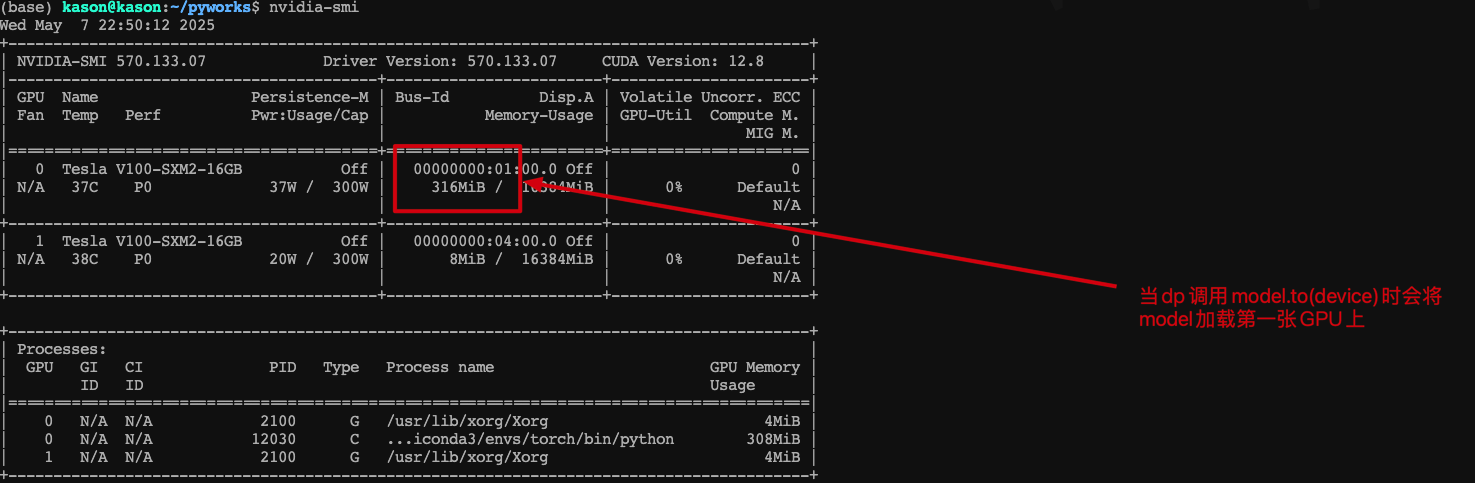

In [4]:

model = Model(input_col_size, output_size)

if torch.cuda.device_count() > 1:
    print("Let's use", torch.cuda.device_count(), "GPUs!")
    # dim = 0 [30, xxx] -> [15, ...], [15, ...], on 2 GPUs
    model = nn.DataParallel(model, device_ids=[0, 1], output_device=0, dim=0)

model.to(device) # 等价于model = model.to(device)
model

Let's use 2 GPUs!


DataParallel(
  (module): Model(
    (linear): Linear(in_features=5, out_features=2, bias=True)
  )
)

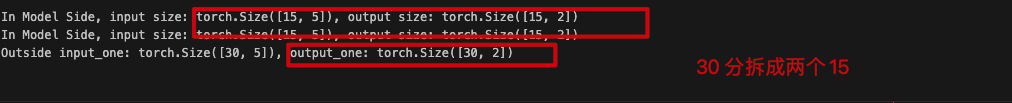

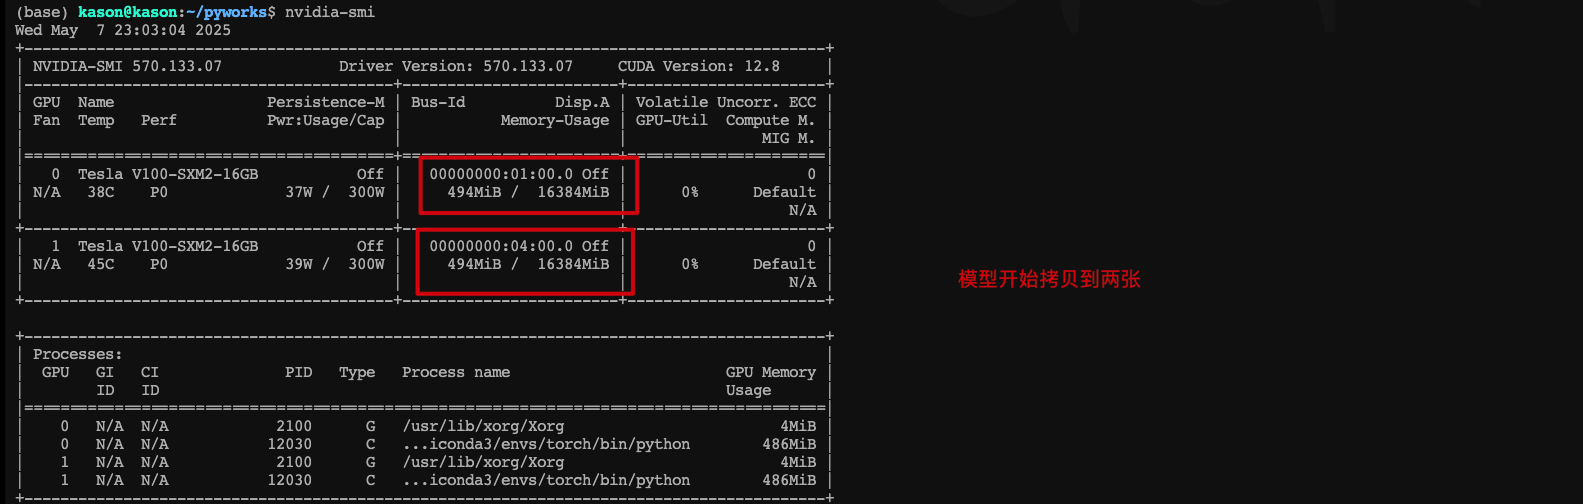

In [5]:
input_one = next(iter(dataloader))
input_one = input_one.to(device)


output_one = model(input_one)

print(f'Outside input_one: {input_one.shape} on device {input_one.device}, output_one: {output_one.shape} on device {output_one.device}')

In Model Side, input size: torch.Size([15, 5]) on device cuda:0, output size: torch.Size([15, 2]) on device cuda:0
In Model Side, input size: torch.Size([15, 5]) on device cuda:1, output size: torch.Size([15, 2]) on device cuda:1
Outside input_one: torch.Size([30, 5]) on device cuda:0, output_one: torch.Size([30, 2]) on device cuda:0


/home/kason/miniconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/linear.py:125: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /opt/conda/conda-bld/pytorch_1729647378361/work/aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return F.linear(input, self.weight, self.bias)


In [6]:
for data in dataloader:
    
    output = model(data)
    print(f'Outside input_one: {data.shape} on device {data.device}, output_one: {output.shape} on device {output.device}')

In Model Side, input size: torch.Size([15, 5]) on device cuda:0, output size: torch.Size([15, 2]) on device cuda:0In Model Side, input size: torch.Size([15, 5]) on device cuda:1, output size: torch.Size([15, 2]) on device cuda:1

Outside input_one: torch.Size([30, 5]) on device cpu, output_one: torch.Size([30, 2]) on device cuda:0
In Model Side, input size: torch.Size([15, 5]) on device cuda:0, output size: torch.Size([15, 2]) on device cuda:0
In Model Side, input size: torch.Size([15, 5]) on device cuda:1, output size: torch.Size([15, 2]) on device cuda:1
Outside input_one: torch.Size([30, 5]) on device cpu, output_one: torch.Size([30, 2]) on device cuda:0
In Model Side, input size: torch.Size([15, 5]) on device cuda:0, output size: torch.Size([15, 2]) on device cuda:0
In Model Side, input size: torch.Size([15, 5]) on device cuda:1, output size: torch.Size([15, 2]) on device cuda:1
Outside input_one: torch.Size([30, 5]) on device cpu, output_one: torch.Size([30, 2]) on device cuda:0
I